In [1]:
%matplotlib inline

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import json

In [2]:
# import data

# fileName = './sample.json'
fileName = './../LibrarianBot/crawler/data/mcitags_vectors.json'

data = []
with open(fileName) as f:
    for line in f:
        data.append(json.loads(line))

In [4]:
pageVectors = [json.loads(pv) for pv in open(fileName, "r").read().splitlines()]

In [13]:
pageVectors[0]

{'ancestorId': '144755393',
 'pageId': '144755393',
 'pageTitle': 'Meeting notes (2)',
 'vector': [0.06401179730892181,
  0.15662038326263428,
  0.11616499722003937,
  -0.011457214131951332,
  -0.25642549991607666,
  -0.014050106517970562,
  0.18148621916770935,
  -0.06800200045108795,
  0.09165589511394501,
  0.8115004301071167,
  -0.18844541907310486,
  -0.04599500074982643,
  0.009922697208821774,
  -0.05935549736022949,
  -0.2394568920135498,
  -0.09596149623394012,
  -0.22170290350914001,
  0.8712090253829956,
  -0.10178451240062714,
  -0.025692109018564224,
  0.07597421109676361,
  0.02197549305856228,
  0.30010658502578735,
  0.007904810830950737,
  -0.05057629942893982,
  0.22816410660743713,
  -0.08250349760055542,
  -0.1422766000032425,
  -0.007697002496570349,
  0.18312479555606842,
  -0.0668594017624855,
  -0.06229470297694206,
  0.2012779712677002,
  0.07839260250329971,
  -0.008622701279819012,
  -0.11678500473499298,
  0.17942959070205688,
  0.15992338955402374,
  -0.052

In [22]:
# pageVectors.index(pageId == 144755393)
# filtered_lst = [(x,y) for x,y in enumerate(list_A) if y > 0]

vector = next( (idx for idx, item in enumerate(pageVectors) if item['pageId'] == '14455393'), None)

print(vector)

None


In [11]:
pageId

In [36]:
data[0]

{'ancestorId': '144755393',
 'pageId': '144755393',
 'pageTitle': 'Meeting notes (2)',
 'vector': [0.06401179730892181,
  0.15662038326263428,
  0.11616499722003937,
  -0.011457214131951332,
  -0.25642549991607666,
  -0.014050106517970562,
  0.18148621916770935,
  -0.06800200045108795,
  0.09165589511394501,
  0.8115004301071167,
  -0.18844541907310486,
  -0.04599500074982643,
  0.009922697208821774,
  -0.05935549736022949,
  -0.2394568920135498,
  -0.09596149623394012,
  -0.22170290350914001,
  0.8712090253829956,
  -0.10178451240062714,
  -0.025692109018564224,
  0.07597421109676361,
  0.02197549305856228,
  0.30010658502578735,
  0.007904810830950737,
  -0.05057629942893982,
  0.22816410660743713,
  -0.08250349760055542,
  -0.1422766000032425,
  -0.007697002496570349,
  0.18312479555606842,
  -0.0668594017624855,
  -0.06229470297694206,
  0.2012779712677002,
  0.07839260250329971,
  -0.008622701279819012,
  -0.11678500473499298,
  0.17942959070205688,
  0.15992338955402374,
  -0.052

In [37]:
# get vectors of each data
vectors = [];
pageIds = [];
pageTitles = [];
labels = [];
for page in data:
    vectors.append(page["vector"])
    pageIds.append(page["pageId"])
    pageTitles.append(page["pageTitle"])
    labels.append(page["ancestorId"])

In [38]:
# convert to np arrays
np_vectors = np.array(vectors)
np_pageIds = np.array(pageIds)
np_pageTitles = np.array(pageTitles)
np_labels = np.array(labels)

## Kmeans

In [39]:
# model
numClusters = 10
kmeans = KMeans(n_clusters=numClusters)
kmeans = kmeans.fit(np_vectors)
kmeans_labels = kmeans.predict(np_vectors)

In [40]:
indices = kmeans_labels == 0
np_pageTitles[indices]

array(['2017-06-28 First PI Team Retrospective',
       '2016-11-04 AID Server Allocation Meeting Notes',
       'MCI Instance Checkout', 'MCI Weekly QA Standup',
       '2018-05-22 FI Testing Review',
       '2018-07-19: Coordinating for Demo to MC', 'Test Plans',
       '2018-07-10 Meeting notes - Can MI Serve as a Platform for LMI',
       '2018-03-29: TypeScript',
       '2018-03-6: Renner Team Post-Training Feedback',
       '2017-06-15 - BI First Retrospective', 'JIRA Migration Plan',
       '2017-05-04 [ONGOING] Cards fail to load', 'Sprint Planning',
       'Kickball', 'Jai Alai', 'ICOs', 'Horses', 'Euchre',
       'Bachelorette (PI)', '2018-06-12 Release: AID-052', 'Action Items',
       'NYC New Hire Brown Bags / Training Sessions', 'Dominican',
       '2018-07-11: MCG-MRC Testing Review', 'All AID instances',
       'MCI PA Standups', '2018-08-??: The Ersatz Elevator',
       "2018-01-19 Why are Marisa Brazil's sales so low compared to its CompSet",
       'MCI - Show and Te

In [16]:
indices = kmeans_labels == 9
np_pageTitles[indices]

array(['How to Setup Import Review', 'FAQs',
       'Offsite 2018 Goals Tracking', '2018/04/23 Kickoff',
       'DA Office Hours', 'Final Presentations',
       'Updating Applicable Start and End Dates', 'Code Reviewer List',
       'Typed to Master', 'SQL & Other Software versions',
       'Import Automation', 'Data Team Project Management',
       'Vertical: Restaurants', 'Training Schedules', 'Stored Procedures',
       'New Data Sets to Pursue', 'Cross-Office Training',
       'APT Software Modules Training for DAs - 2017',
       'SmartSQL Tasks - RollUps', 'Data Training Videos',
       'Analytic Impacts of Metric Setup', 'Kicking Off a Loop',
       'Vertical: Consumer Packaged Goods'], dtype='<U83')

## PCA

In [43]:
from sklearn import decomposition


In [44]:
pca = decomposition.PCA(n_components=3)
pca.fit(np_vectors)
pca_vectors = pca.transform(np_vectors)

In [45]:
print(pca_vectors[0])

[ 0.66841311 -0.45697051  0.19049625]


In [46]:
np_labels

array(['144755393', '131895487', '134704156', '136572033', '134698778',
       '131895487', '131895487', '134698778', '131895487', '131895487',
       '131895487', '131895487', '131895487', '131895487', '134698778',
       '134698778', '131895487', '134698706', '134698706', '134704156',
       '134704156', '134704156', '134698706', '134698706', '134698706',
       '134698706', '134698706', '134698706', '134698706', '134698706',
       '134698706', '134698706', '134698706', '134698706', '134698706',
       '134698706', '134698706', '134698706', '134698706', '134698706',
       '134698706', '134698706', '134704156', '134698706', '134704156',
       '134698706', '134704156', '134698706', '134698706', '134698706',
       '134698706', '134698706', '134698778', '134698778', '134698778',
       '134698706', '134698706', '134698706', '134698706', '134698706',
       '134698706', '134698706', '134698706', '134698706', '134698706',
       '134698706', '134698706', '134698706', '134698706', '1346

In [47]:
d = {ni: indi for indi, ni in enumerate(set(np_labels))}
plot_labels = [d[ni] for ni in np_labels]

In [48]:
np.unique(plot_labels)

array([0, 1, 2, 3, 4, 5])

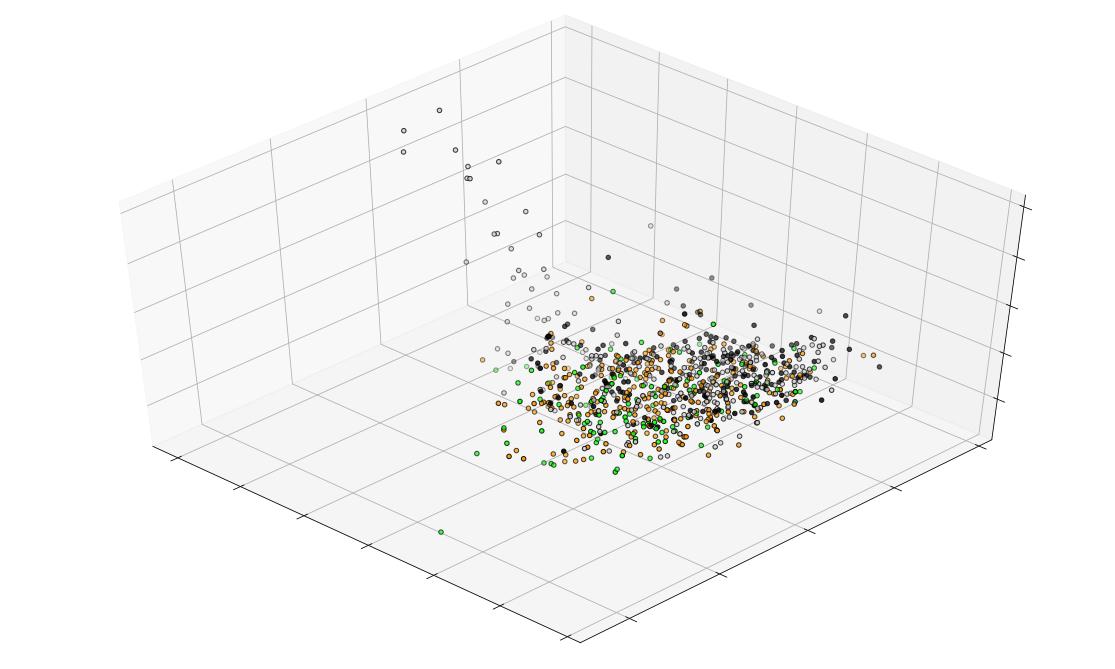

In [49]:
fig = plt.figure(1, figsize=(16, 9))
plt.clf() # Clear current figure 
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla() # Clear current axis

ax.scatter(pca_vectors[:, 0], pca_vectors[:, 1], pca_vectors[:, 2], c=plot_labels, cmap=plt.cm.spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()


In [21]:
ax.scatter(pca_vectors[:, 0], pca_vectors[:, 1], pca_vectors[:, 2], c=np.ones(len(np_pageTitles)),
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

[]

In [24]:
plt.show();

'module://ipykernel.pylab.backend_inline'

## Decision Tree

In [50]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

import numpy as np

In [51]:
clf = DecisionTreeClassifier(random_state=0)


In [53]:
np.shape(np_vectors)

(860, 300)

In [54]:
np.shape(plot_labels)

(860,)

In [55]:
cross_val_score(clf, np_vectors, plot_labels, cv=10)

C:\Users\dkang\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


array([0.31111111, 0.38636364, 0.38636364, 0.37209302, 0.3372093 ,
       0.34883721, 0.48809524, 0.35714286, 0.3452381 , 0.25      ])